In [1]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [2]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, shuffle=False)

In [3]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [4]:
def gradient(x, y):
    return -(x - y)

In [5]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

base_algorithms_list = []
coefficients_list = []
N = 50
next_y = train_y.copy()
current_y = np.zeros(train_y.shape[0])

for i in range(N):
    model = DecisionTreeRegressor(random_state=42, max_depth=5)
    model.fit(train_X, next_y)
    p_y = model.predict(train_X)
    base_algorithms_list.append(model)
    coeff = 0.9 / (1 + i)
    coefficients_list.append(coeff)
    for j in range(next_y.shape[0]):
        current_y[j] = current_y[j] + coeff * p_y[j]
        next_y[j] = gradient(current_y[j], train_y[j])
    

In [6]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff 
                 in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [7]:
pred_y = gbm_predict(test_X)

from sklearn.metrics import mean_squared_error
import math

error = math.sqrt(mean_squared_error(pred_y, test_y))

print(error)

4.812550945781193


In [8]:
def write_to_file(x, name):
    with open(f'{name}.text', 'w') as fl:
        fl.write(' '.join(list(map(lambda x: str(x), x))))

In [9]:
write_to_file([error], 1)

In [55]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_X, label=train_y)
dtest = xgb.DMatrix(test_X, label=test_y)
evallist = [(dtest, 'eval'), (dtrain, 'train')]

errors = []
for i in range(50):
    param = {'max_depth': i}
    num_round = 200
    progress = {}
    bst = xgb.train(param, dtrain, num_round, evallist, evals_result=progress, verbose_eval=1000)
    ers = progress['eval']['rmse']
    errors.append(ers[len(ers) - 1])
    
print(errors)

[0]	eval-rmse:8.90445	train-rmse:19.33520
[199]	eval-rmse:11.46700	train-rmse:8.79035
[0]	eval-rmse:9.41606	train-rmse:18.82894
[199]	eval-rmse:6.66909	train-rmse:2.12956
[0]	eval-rmse:10.11017	train-rmse:18.69175
[199]	eval-rmse:4.77136	train-rmse:0.73064
[0]	eval-rmse:10.23610	train-rmse:18.63280
[199]	eval-rmse:4.56384	train-rmse:0.20294
[0]	eval-rmse:10.22494	train-rmse:18.62304
[199]	eval-rmse:4.90636	train-rmse:0.02806
[0]	eval-rmse:10.22494	train-rmse:18.62304
[199]	eval-rmse:5.04542	train-rmse:0.00324
[0]	eval-rmse:10.22494	train-rmse:18.62304
[199]	eval-rmse:5.04394	train-rmse:0.00121
[0]	eval-rmse:10.22494	train-rmse:18.62304
[199]	eval-rmse:5.22556	train-rmse:0.00121
[0]	eval-rmse:10.22494	train-rmse:18.62304
[199]	eval-rmse:5.08770	train-rmse:0.00109
[0]	eval-rmse:10.22494	train-rmse:18.62304
[199]	eval-rmse:5.14412	train-rmse:0.00111
[0]	eval-rmse:10.22494	train-rmse:18.62304
[199]	eval-rmse:4.82046	train-rmse:0.00084
[0]	eval-rmse:10.22494	train-rmse:18.62304
[199]	eval-r

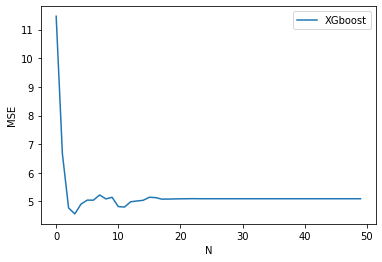

In [56]:


import matplotlib.pyplot as plt

plt.plot(range(50), errors, label='XGboost')
plt.ylabel('MSE')
plt.xlabel('N')
plt.legend()
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

error = math.sqrt(mean_squared_error(pred_y, test_y))
print(error)

8.254979753549401


In [59]:
write_to_file([error], 5)